In [1]:
# change working directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

/home/matej


In [1]:
%cd ~/prace/ferda/ferda_github/

/home/matej/prace/ferda/ferda_github


In [2]:
import os
import pandas as pd
import yaml
from collections import defaultdict
from os.path import join

In [3]:
# evaluations = {}
# evaluations['5Zebrafish_nocover_22min'] = [
#     { 
#         'exp_name': 'idtracker_nogaps',
#         'evaluation':  'experiments/tracking/5Zebrafish_nocover_22min/__idtracker_nogaps/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/5Zebrafish_nocover_22min/__idtracker_nogaps/results.txt'
#     },
#     { 
#         'exp_name': 'idtracker',
#         'evaluation': 'experiments/tracking/5Zebrafish_nocover_22min/__idtracker/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/5Zebrafish_nocover_22min/__idtracker/results.txt'
#     },
#     { 
#         'exp_name': 'toxtrac',
#         'evaluation': 'experiments/tracking/5Zebrafish_nocover_22min/__toxtrac/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/5Zebrafish_nocover_22min/__toxtrac/results.txt'
#     },
#     { 
#         'exp_name': '180427_vaib',
#         'evaluation': 'experiments/tracking/5Zebrafish_nocover_22min/180427_vaib/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/5Zebrafish_nocover_22min/180427_vaib/results.txt'
#     },
#     { 
#         'exp_name': '180626',
#         'evaluation': '../projects/regression/zebrafish_new/evaluation.csv'
#     },    
# ]

# evaluations['Cam1_clip'] = [
#     { 
#         'exp_name': 'idtracker',
#         'evaluation': 'experiments/tracking/Cam1_clip/__idtracker/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Cam1_clip/__idtracker/results.txt'
#     },
#     { 
#         'exp_name': 'idtracker_nogaps',
#         'evaluation': 'experiments/tracking/Cam1_clip/__idtracker_nogaps/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Cam1_clip/__idtracker_nogaps/results.txt'
#     },        
#     { 
#         'exp_name': 'toxtrac',
#         'evaluation': 'experiments/tracking/Cam1_clip/__toxtrac/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Cam1_clip/__toxtrac/results.txt'
#     },        
#     { 
#         'exp_name': 'toxtrac_tight_segmentation',
#         'evaluation': 'experiments/tracking/Cam1_clip/__toxtrac_better_thresh/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Cam1_clip/__toxtrac_better_thresh/results.txt'
#     },          
#     { 
#         'exp_name': '180427_vaib',
#         'evaluation': 'experiments/tracking/Cam1_clip/180427_vaib/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Cam1_clip/180427_vaib/results.txt'
#     },      
#     { 
#         'exp_name': '180704',
#         'evaluation': '/home/matej/prace/ferda/projects/regression/cam1_clip_new/evaluation.csv',
#     },
# ]

# evaluations['Sowbug3_cut'] = [
#     { 
#         'exp_name': 'idtracker',
#         'evaluation': 'experiments/tracking/Sowbug3_cut/__idtracker/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Sowbug3_cut/__idtracker/results.txt'
#     },
#     { 
#         'exp_name': 'idtracker_nogaps',
#         'evaluation': 'experiments/tracking/Sowbug3_cut/__idtracker_nogaps/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Sowbug3_cut/__idtracker_nogaps/results.txt'
#     },        
#     { 
#         'exp_name': 'toxtrac',
#         'evaluation': 'experiments/tracking/Sowbug3_cut/__toxtrac/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Sowbug3_cut/__toxtrac/results.txt'
#     },            
#     { 
#         'exp_name': '180626',
#         'evaluation': '../projects/regression/Sowbug3_cut_min1_new/evaluation.csv',
#     },
# #    '180427_vaib': 'experiments/tracking/Sowbug3_cut/180427_vaib/evaluation.csv',    
# ]

# evaluations['Camera3-5min'] = [
#     { 
#         'exp_name': 'idtracker',
#         'evaluation': 'experiments/tracking/Camera3-5min/__idtracker/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Camera3-5min/__idtracker/results.txt'
#     },
#     { 
#         'exp_name': 'idtracker_nogaps',
#         'evaluation': 'experiments/tracking/Camera3-5min/__idtracker_nogaps/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Camera3-5min/__idtracker_nogaps/results.txt'
#     },        
#     { 
#         'exp_name': 'toxtrac',
#         'evaluation': 'experiments/tracking/Camera3-5min/__toxtrac/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Camera3-5min/__toxtrac/results.txt'
#     },            
#     { 
#         'exp_name': '180427_vaib',
#         'evaluation': 'experiments/tracking/Camera3-5min/180427_vaib/evaluation.csv',
#         'mot_trajectories': 'experiments/tracking/Camera3-5min/180427_vaib/results.txt'
#     },
# ]


In [4]:
# # write evaluation to experiment.yaml
# for dataset_name, dataset_evals in evaluations.items():
#     dataset = dict(experiments['datasets'][dataset_name])
#     del dataset['initial_project']
#     del dataset['reidentification_weights']
#     del dataset['visualize_experiments']
#     for exp in dataset_evals:      
#         d = {'dataset_name': dataset_name,
#               'exp_name': exp['exp_name'],
#                'dataset': dataset,
#             }
#         out_filename = os.path.join(os.path.dirname(exp['evaluation']), 'experiment.yaml')
#         if not os.path.exists(out_filename):
#             with open(out_filename, 'w') as fw:
#                 yaml.dump(d, fw)
#         else:
#             print('haven\'t overwritten ' + out_filename)

In [5]:
with open('experiments.yaml', 'r') as fr:
    experiments = yaml.load(fr)

In [6]:
evaluations = defaultdict(list)
for directory, dirnames, filenames in sorted(os.walk(experiments['dir']), key=lambda x: os.path.basename(x[0])):
    if directory == experiments['dir']:
        continue
        
    if ('experiment.yaml' in filenames) and ('evaluation.csv' in filenames):       
        with open(join(directory, 'experiment.yaml'), 'r') as fr:
            experiment_config = yaml.load(fr)
        
        experiment_config['evaluation'] = join(directory, 'evaluation.csv')
        if 'results.txt' in filenames:
            experiment_config['mot_trajectories'] = join(directory, 'results.txt')        
        evaluations[experiment_config['dataset_name']].append(experiment_config)
    else:
        print('no experiment.yaml and/or evaluation.csv in {}'.format(directory))

no experiment.yaml and/or evaluation.csv in experiments/tracking/.ipynb_checkpoints
no experiment.yaml and/or evaluation.csv in experiments/tracking/0_other_trackers
no experiment.yaml and/or evaluation.csv in experiments/tracking/Sowbug3/180427_vaib
no experiment.yaml and/or evaluation.csv in experiments/tracking/0_other_trackers/5Zebrafish_nocover_22min
no experiment.yaml and/or evaluation.csv in experiments/tracking/0_other_trackers/Cam1_clip
no experiment.yaml and/or evaluation.csv in experiments/tracking/0_other_trackers/Camera3-5min
no experiment.yaml and/or evaluation.csv in experiments/tracking/Sowbug3
no experiment.yaml and/or evaluation.csv in experiments/tracking/0_other_trackers/Sowbug3_cut


In [7]:
from utils.gt.mot import load_mot, eval_and_save

In [32]:
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 30)

In [8]:
# for dataset, dataset_experiments in evaluations.items():
#     for experiment in dataset_experiments:
#         print(experiment['mot_trajectories'])
#         eval_and_save(experiment['dataset']['gt'], experiment['mot_trajectories'], experiment['evaluation'])


Camera3-5min


,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,...,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,
idtracker,4500,NaN,NaN,40305,14,1,4681,40319,45000,40320,...,0.895644,0.999975,0.895978,NaN,187.0,4867.0,40133.0,0.995362,0.891844,0.940764
idtracker_nogaps,4500,NaN,NaN,44846,0,73,154,44846,45000,44919,...,0.994956,0.998375,0.996578,NaN,73.0,154.0,44846.0,0.998375,0.996578,0.997476
toxtrac,4500,NaN,NaN,34002,108,1,10890,34110,45000,34111,...,0.755578,0.999971,0.758000,NaN,8670.0,19559.0,25441.0,0.745830,0.565356,0.643172
180427_vaib,4500,NaN,NaN,40417,10,1,4573,40427,45000,40428,...,0.898133,0.999975,0.898378,NaN,27.0,4599.0,40401.0,0.999332,0.897800,0.945849
initial,4500,NaN,NaN,16594,29,0,28377,16623,45000,16623,...,0.368756,1.000000,0.369400,NaN,7843.0,36220.0,8780.0,0.528184,0.195111,0.284959
fixed_cardinality,4500,NaN,NaN,36830,77,3,8093,36907,45000,36910,...,0.818378,0.999919,0.820156,NaN,10571.0,18661.0,26339.0,0.713601,0.585311,0.643120


Cam1_clip


,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,...,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,
idtracker,4500,NaN,NaN,16408,18,0,10574,16426,27000,16426,...,0.607704,1.000000,0.608370,NaN,67.0,10641.0,16359.0,0.995921,0.605889,0.753420
idtracker_nogaps,4500,NaN,NaN,24293,2,7,2705,24295,27000,24302,...,0.899481,0.999712,0.899815,NaN,14.0,2712.0,24288.0,0.999424,0.899556,0.946864
toxtrac_tight_segmentation,4500,NaN,NaN,14048,13,0,12939,14061,27000,14061,...,0.520296,1.000000,0.520778,NaN,658.0,13597.0,13403.0,0.953204,0.496407,0.652834
toxtrac,4500,NaN,NaN,11471,167,0,15362,11638,27000,11638,...,0.424852,1.000000,0.431037,NaN,9762.0,25124.0,1876.0,0.161196,0.069481,0.097106
180427_vaib,4500,NaN,NaN,18898,6,0,8096,18904,27000,18904,...,0.699926,1.000000,0.700148,NaN,16.0,8112.0,18888.0,0.999154,0.699556,0.822935
initial,4500,NaN,NaN,19126,46,9,7828,19172,27000,19181,...,0.708037,0.999531,0.710074,NaN,1820.0,9639.0,17361.0,0.905114,0.643000,0.751868
fixed_cardinality,4500,NaN,NaN,19000,34,1,7966,19034,27000,19035,...,0.703667,0.999947,0.704963,NaN,1167.0,9132.0,17868.0,0.938692,0.661778,0.776279


5Zebrafish_nocover_22min


,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,...,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,
idtracker,15000,NaN,NaN,60855,160,353,13985,61015,75000,61368,...,0.806693,0.994248,0.813533,NaN,1407.0,15039.0,59961.0,0.977073,0.799480,0.879400
idtracker_nogaps,15000,NaN,NaN,70933,132,3898,3935,71065,75000,74963,...,0.893800,0.948001,0.947533,NaN,5181.0,5218.0,69782.0,0.930886,0.930427,0.930656
toxtrac,15000,NaN,NaN,64641,0,1,10359,64641,75000,64642,...,0.861867,0.999985,0.861880,NaN,1.0,10359.0,64641.0,0.999985,0.861880,0.925810
180427_vaib,15000,NaN,NaN,66140,29,15,8831,66169,75000,66184,...,0.881667,0.999773,0.882253,NaN,68.0,8884.0,66116.0,0.998973,0.881547,0.936593
initial,15000,NaN,NaN,69707,243,16,5050,69950,75000,69966,...,0.929213,0.999771,0.932667,NaN,36001.0,41035.0,33965.0,0.485450,0.452867,0.468593
fixed_cardinality,15000,NaN,NaN,68298,257,10,6445,68555,75000,68565,...,0.910507,0.999854,0.914067,NaN,29191.0,35626.0,39374.0,0.574258,0.524987,0.548518


Sowbug3_cut


,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,...,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,
idtracker,6734,NaN,NaN,20124,4,6,13542,20128,33670,20134,...,0.597505,0.999702,0.597802,NaN,383.0,13919.0,19751.0,0.980977,0.586605,0.734183
idtracker_nogaps,6734,NaN,NaN,22483,4,6,11183,22487,33670,22493,...,0.667568,0.999733,0.667865,NaN,383.0,11560.0,22110.0,0.982972,0.656668,0.787351
toxtrac,6734,NaN,NaN,18641,2,0,15027,18643,33670,18643,...,0.553638,1.000000,0.553698,NaN,139.0,15166.0,18504.0,0.992544,0.549569,0.707434
initial,6734,NaN,NaN,19932,9,2,13729,19941,33670,19943,...,0.591922,0.999900,0.592248,NaN,4051.0,17778.0,15892.0,0.796871,0.471993,0.592841
fixed_cardinality,6734,NaN,NaN,19810,16,3,13844,19826,33670,19829,...,0.588268,0.999849,0.588833,NaN,5235.0,19076.0,14594.0,0.735993,0.433442,0.545580


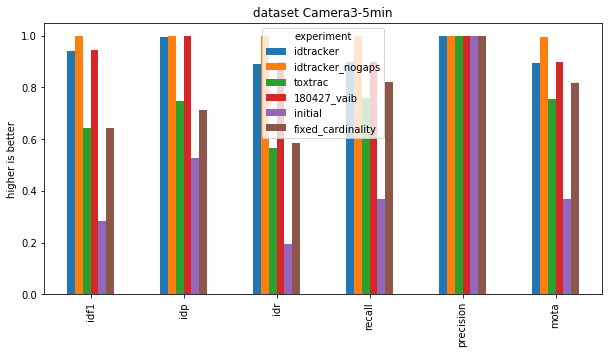

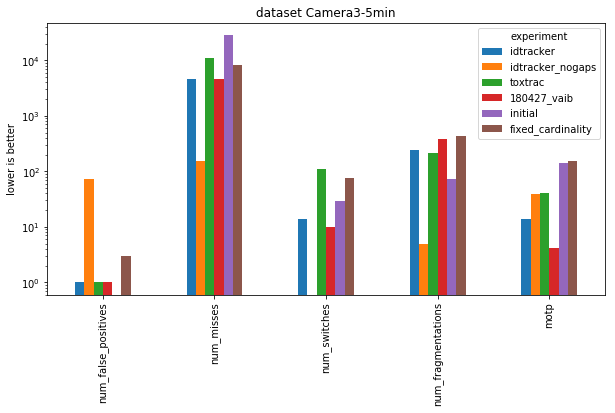

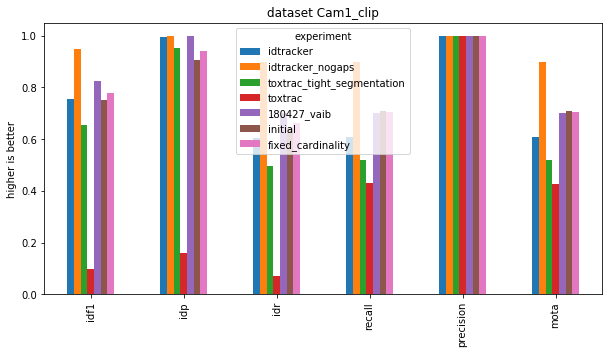

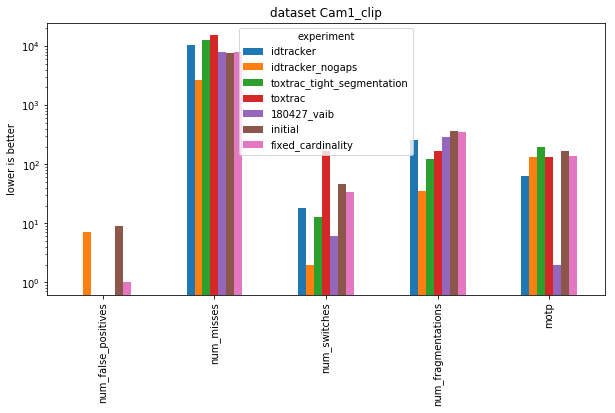

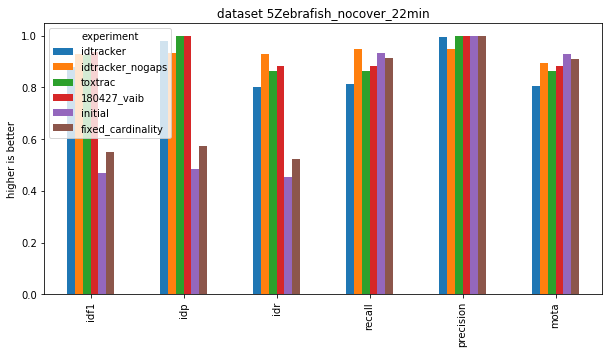

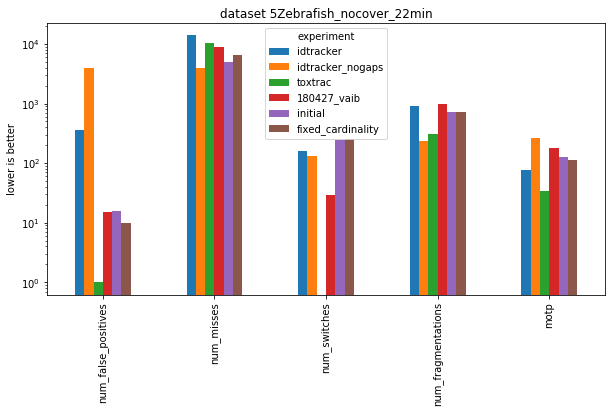

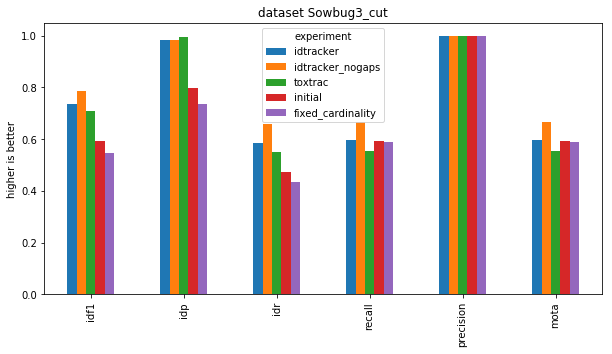

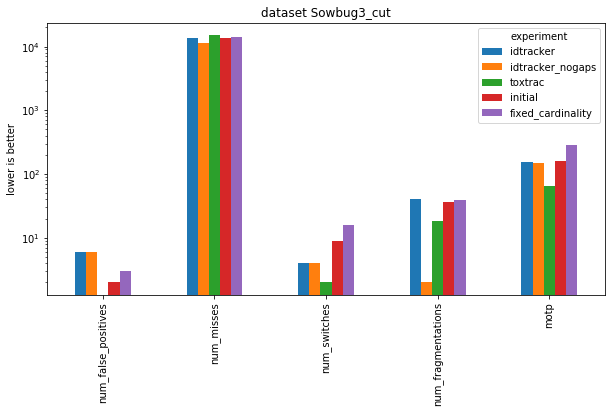

In [9]:
df_evaluations = {}
for dataset, dataset_experiments in evaluations.items(): 
    all_evals = []
    for experiment in dataset_experiments:
        df = pd.read_csv(experiment['evaluation'])
        df.insert(0, 'experiment', experiment['exp_name'])
        all_evals.append(df)
    df = pd.concat(all_evals).set_index('experiment')
    
    df.name = dataset
    print(df.name)
    display(df)
    df_evaluations[df.name] = df
    # df.to_csv('{}_comparison.csv'.format(dataset_name))
    ax = df[['idf1', 'idp', 'idr', 'recall', 'precision','mota']].T.plot.bar(figsize=(10, 5), title='dataset ' + dataset)
    _ = ax.set_ylabel('higher is better')
#    display(ax)
    ax = df[['num_false_positives', 'num_misses', 'num_switches','num_fragmentations', 'motp']].T.plot.bar(figsize=(10, 5), logy=True, title='dataset ' + dataset)
    _ = ax.set_ylabel('lower is better')
#    display(ax)    

In [12]:
df_evaluations['Cam1_clip']

,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,...,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,
idtracker,4500,NaN,NaN,16408,18,0,10574,16426,27000,16426,...,0.607704,1.000000,0.608370,NaN,67.0,10641.0,16359.0,0.995921,0.605889,0.753420
idtracker_nogaps,4500,NaN,NaN,24293,2,7,2705,24295,27000,24302,...,0.899481,0.999712,0.899815,NaN,14.0,2712.0,24288.0,0.999424,0.899556,0.946864
toxtrac_tight_segmentation,4500,NaN,NaN,14048,13,0,12939,14061,27000,14061,...,0.520296,1.000000,0.520778,NaN,658.0,13597.0,13403.0,0.953204,0.496407,0.652834
toxtrac,4500,NaN,NaN,11471,167,0,15362,11638,27000,11638,...,0.424852,1.000000,0.431037,NaN,9762.0,25124.0,1876.0,0.161196,0.069481,0.097106
180427_vaib,4500,NaN,NaN,18898,6,0,8096,18904,27000,18904,...,0.699926,1.000000,0.700148,NaN,16.0,8112.0,18888.0,0.999154,0.699556,0.822935
initial,4500,NaN,NaN,19126,46,9,7828,19172,27000,19181,...,0.708037,0.999531,0.710074,NaN,1820.0,9639.0,17361.0,0.905114,0.643000,0.751868
fixed_cardinality,4500,NaN,NaN,19000,34,1,7966,19034,27000,19035,...,0.703667,0.999947,0.704963,NaN,1167.0,9132.0,17868.0,0.938692,0.661778,0.776279


In [29]:
range(len(df))

range(0, 7)

In [84]:
df_evaluations['Ants1'] = df_evaluations.pop('Cam1_clip')
df_evaluations['Ants3'] = df_evaluations.pop('Camera3-5min')
df_evaluations['Zebrafish'] = df_evaluations.pop('5Zebrafish_nocover_22min')
df_evaluations['Sowbugs3'] = df_evaluations.pop('Sowbug3_cut')

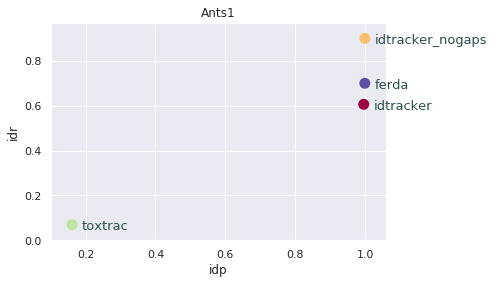

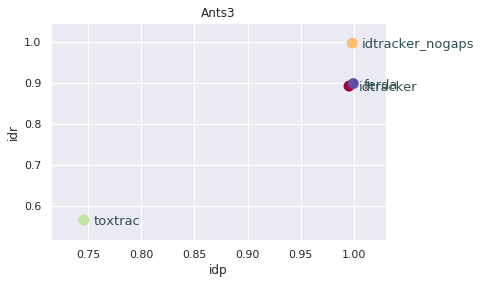

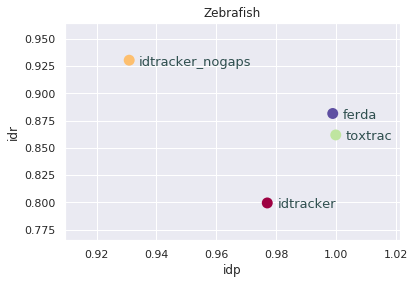

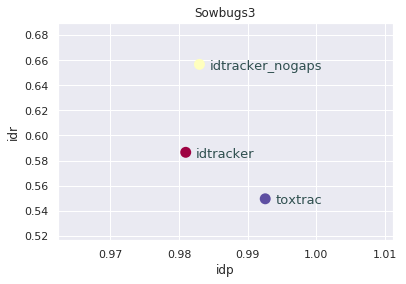

In [86]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
for dataset, df in df_evaluations.items():
    try:
        as_list = df.index.tolist()
        idx = as_list.index('180427_vaib')
        as_list[idx] = 'ferda'
        df.index = as_list
    except:
        pass    
    df = df[~((df.index == 'initial') | (df.index == 'fixed_cardinality') | (df.index == 'toxtrac_tight_segmentation'))]
    fig, ax = plt.subplots()

    df.plot('idp', 'idr', kind='scatter', ax=ax, s=120, linewidth=0, 
            c=range(len(df)), colormap=cmap, colorbar=None, title=dataset)

    for k, v in df.iterrows():
        ax.annotate(k, v[['idp', 'idr']],
                    xytext=(10,-5), textcoords='offset points', 
                    family='sans-serif', fontsize=13, color='darkslategrey')
        # /home/matej/Private/Dropbox/shared/vaib_prezentace/
    plt.savefig('{}.png'.format(dataset), bbox_inches='tight')

In [65]:
df[~((df.index == 'initial') | (df.index == 'fixed_cardinality'))]

,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,...,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,
idtracker,6734,NaN,NaN,20124,4,6,13542,20128,33670,20134,...,0.597505,0.999702,0.597802,NaN,383.0,13919.0,19751.0,0.980977,0.586605,0.734183
idtracker_nogaps,6734,NaN,NaN,22483,4,6,11183,22487,33670,22493,...,0.667568,0.999733,0.667865,NaN,383.0,11560.0,22110.0,0.982972,0.656668,0.787351
toxtrac,6734,NaN,NaN,18641,2,0,15027,18643,33670,18643,...,0.553638,1.000000,0.553698,NaN,139.0,15166.0,18504.0,0.992544,0.549569,0.707434


In [64]:
(df.index == 'initial') | (df.index == 'fixed_cardinality')

array([False, False, False,  True,  True])

In [27]:
# df_evaluations['Cam1_clip'][['idp', 'idr']].plot.scatter('idp', 'idr', )
import seaborn as sns
sns.set()
a = df_evaluations['Cam1_clip']
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="idp", y="idr",
                     hue=np.array(df_evaluations['Cam1_clip'].index),
                     palette=cmap, 
                     data=df_evaluations['Cam1_clip'])

TypeError: 'ListedColormap' object is not iterable

In [43]:
df_evaluations['Cam1_clip']

,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,num_unique_objects,track_ratios,mostly_tracked,partially_tracked,mostly_lost,num_fragmentations,motp,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,4500,NaN,NaN,16408,18,0,10574,16426,27000,16426,6,NaN,1,5,0,259,63.196044,0.607704,1.000000,0.608370,NaN,67.0,10641.0,16359.0,0.995921,0.605889,0.753420
idtracker_nogaps,4500,NaN,NaN,24293,2,7,2705,24295,27000,24302,6,NaN,6,0,0,35,133.556985,0.899481,0.999712,0.899815,NaN,14.0,2712.0,24288.0,0.999424,0.899556,0.946864
toxtrac_tight_segmentation,4500,NaN,NaN,14048,13,0,12939,14061,27000,14061,6,NaN,0,6,0,122,195.002656,0.520296,1.000000,0.520778,NaN,658.0,13597.0,13403.0,0.953204,0.496407,0.652834
toxtrac,4500,NaN,NaN,11471,167,0,15362,11638,27000,11638,6,NaN,0,6,0,166,133.370349,0.424852,1.000000,0.431037,NaN,9762.0,25124.0,1876.0,0.161196,0.069481,0.097106
180427_vaib,4500,NaN,NaN,18898,6,0,8096,18904,27000,18904,6,NaN,2,4,0,288,1.974294,0.699926,1.000000,0.700148,NaN,16.0,8112.0,18888.0,0.999154,0.699556,0.822935
initial,4500,NaN,NaN,19126,46,9,7828,19172,27000,19181,6,NaN,3,3,0,367,167.486351,0.708037,0.999531,0.710074,NaN,1820.0,9639.0,17361.0,0.905114,0.643000,0.751868
fixed_cardinality,4500,NaN,NaN,19000,34,1,7966,19034,27000,19035,6,NaN,2,4,0,355,138.025728,0.703667,0.999947,0.704963,NaN,1167.0,9132.0,17868.0,0.938692,0.661778,0.776279


In [41]:
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
df_evaluations['Camera3-5min']

,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,num_unique_objects,track_ratios,mostly_tracked,partially_tracked,mostly_lost,num_fragmentations,motp,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,4500,NaN,NaN,40305,14,1,4681,40319,45000,40320,10,NaN,10,0,0,247,13.781312,0.895644,0.999975,0.895978,NaN,187.0,4867.0,40133.0,0.995362,0.891844,0.940764
idtracker_nogaps,4500,NaN,NaN,44846,0,73,154,44846,45000,44919,10,NaN,10,0,0,5,39.111585,0.994956,0.998375,0.996578,NaN,73.0,154.0,44846.0,0.998375,0.996578,0.997476
toxtrac,4500,NaN,NaN,34002,108,1,10890,34110,45000,34111,10,NaN,5,5,0,210,41.122685,0.755578,0.999971,0.758000,NaN,8670.0,19559.0,25441.0,0.745830,0.565356,0.643172
180427_vaib,4500,NaN,NaN,40417,10,1,4573,40427,45000,40428,10,NaN,10,0,0,386,4.154986,0.898133,0.999975,0.898378,NaN,27.0,4599.0,40401.0,0.999332,0.897800,0.945849
initial,4500,NaN,NaN,16594,29,0,28377,16623,45000,16623,10,NaN,0,8,2,73,143.314538,0.368756,1.000000,0.369400,NaN,7843.0,36220.0,8780.0,0.528184,0.195111,0.284959
fixed_cardinality,4500,NaN,NaN,36830,77,3,8093,36907,45000,36910,10,NaN,7,3,0,442,154.163346,0.818378,0.999919,0.820156,NaN,10571.0,18661.0,26339.0,0.713601,0.585311,0.643120


In [42]:
df_evaluations['5Zebrafish_nocover_22min']

,num_frames,obj_frequencies,pred_frequencies,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,num_unique_objects,track_ratios,mostly_tracked,partially_tracked,mostly_lost,num_fragmentations,motp,mota,precision,recall,id_global_assignment,idfp,idfn,idtp,idp,idr,idf1
experiment,,,,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,15000,NaN,NaN,60855,160,353,13985,61015,75000,61368,5,NaN,4,1,0,895,75.908890,0.806693,0.994248,0.813533,NaN,1407.0,15039.0,59961.0,0.977073,0.799480,0.879400
idtracker_nogaps,15000,NaN,NaN,70933,132,3898,3935,71065,75000,74963,5,NaN,5,0,0,234,264.281000,0.893800,0.948001,0.947533,NaN,5181.0,5218.0,69782.0,0.930886,0.930427,0.930656
toxtrac,15000,NaN,NaN,64641,0,1,10359,64641,75000,64642,5,NaN,5,0,0,311,34.326583,0.861867,0.999985,0.861880,NaN,1.0,10359.0,64641.0,0.999985,0.861880,0.925810
180427_vaib,15000,NaN,NaN,66140,29,15,8831,66169,75000,66184,5,NaN,5,0,0,987,181.964081,0.881667,0.999773,0.882253,NaN,68.0,8884.0,66116.0,0.998973,0.881547,0.936593
initial,15000,NaN,NaN,69707,243,16,5050,69950,75000,69966,5,NaN,5,0,0,708,125.085584,0.929213,0.999771,0.932667,NaN,36001.0,41035.0,33965.0,0.485450,0.452867,0.468593
fixed_cardinality,15000,NaN,NaN,68298,257,10,6445,68555,75000,68565,5,NaN,5,0,0,717,112.147895,0.910507,0.999854,0.914067,NaN,29191.0,35626.0,39374.0,0.574258,0.524987,0.548518


In [ ]:
df_evaluations['Cam1_clip']